<a href="https://colab.research.google.com/github/hemilygomes/dojopython/blob/main/Semana_16_01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Para montar o drive e carregar o dataset
from google.colab import drive
drive.mount('/content/drive')
cars = pd.read_csv('/content/drive/MyDrive/colab/cars.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dicionário de Dados

- Symboling 				Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
- carCompany				Name of car company (Categorical)
- fueltype				Car fuel type i.e gas or diesel (Categorical)
- aspiration				Aspiration used in a car (Categorical)
- doornumber				Number of doors in a car (Categorical)
- carbody				body of car (Categorical)
- drivewheel				type of drive wheel (Categorical)
- enginelocation				Location of car engine (Categorical)
- wheelbase				Weelbase of car (Numeric)
- carlength				Length of car (Numeric)
- carwidth				Width of car (Numeric)
- carheight				height of car (Numeric)
- curbweight				The weight of a car without occupants or baggage. (Numeric)
- enginetype				Type of engine. (Categorical)
- cylindernumber				cylinder placed in the car (Categorical)
- enginesize				Size of car (Numeric)
- fuelsystem				Fuel system of car (Categorical)
- boreratio				Boreratio of car (Numeric)
- stroke				Stroke or volume inside the engine (Numeric)
- compressionratio				compression ratio of car (Numeric)
- horsepower				Horsepower (Numeric)
- peakrpm				car peak rpm (Numeric)
- citympg				Mileage in city (Numeric)
- highwaympg				Mileage on highway (Numeric)
- price(Dependent variable)				Price of car (Numeric)


### Tratamento

In [ ]:
cars.drop(columns=['Unnamed: 0'], inplace=True)
cars.replace("?", np.NaN, inplace=True)

In [ ]:
avg_normalized=cars['normalized-losses'].astype('float').mean()
cars['normalized-losses'].replace(np.nan,avg_normalized, inplace=True)

avg_peakrpm=cars['peak-rpm'].astype('float').mean()
cars['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

avg_bore=cars['bore'].astype('float').mean()
cars["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = cars["stroke"].astype("float").mean()
cars["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = cars['horsepower'].astype('float').mean()
cars['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

cars["num-of-doors"].replace(np.NaN, "four", inplace=True)

cars.dropna(subset=["price"], axis=0, inplace=True)

In [ ]:
cars.reset_index(drop=True, inplace=True)

In [ ]:
cars[["normalized-losses"]] = cars[["normalized-losses"]].astype("int")
cars[["horsepower"]] = cars[["horsepower"]].astype("int")

cars[["price"]] = cars[["price"]].astype("float")
cars[["peak-rpm"]] = cars[["peak-rpm"]].astype("float")

# Podemos indicar várias colunas ao mesmo tempo, quando elas possuírem o mesmo tipo de dado
cars[["bore", "stroke"]] = cars[["bore", "stroke"]].astype("float")

In [ ]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


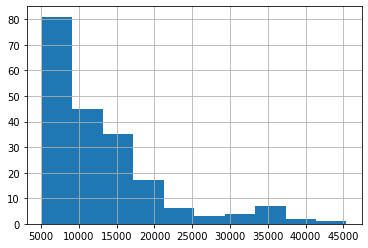

In [ ]:
cars['price'].hist()

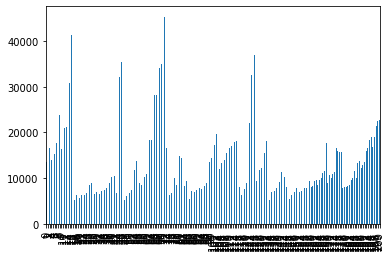

In [ ]:
cars['price'].plot(kind='bar')

In [ ]:
# Qualitativas ordinais

sorted(cars['symboling'].unique())

[-2, -1, 0, 1, 2, 3]

In [ ]:
# Qualitativa nominal

sorted(cars['fuel-type'].unique())

['diesel', 'gas']

In [ ]:
# Quantitativas continuas

print(cars['price'].min(), cars['price'].max())

5118.0 45400.0


In [ ]:
# Quantitativas Discretas 

print(cars['city-mpg'].min(), cars['city-mpg'].max())

13 49


### Distribuição das Frequencias

In [ ]:
# Qualitativas

cars['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
cars['fuel-type'].value_counts(normalize=True) * 100

gas       90.049751
diesel     9.950249
Name: fuel-type, dtype: float64

In [ ]:
frequencia = cars['fuel-type'].value_counts()
percentual = cars['fuel-type'].value_counts(normalize=True) * 100

In [ ]:
freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem': percentual})
freq_qualitativas

,Frequencia,Porcentagem
gas,181,90.049751
diesel,20,9.950249


In [ ]:
freq_qualitativas.rename_axis('fuel-type', axis='columns', inplace=True)
freq_qualitativas

fuel-type,Frequencia,Porcentagem
gas,181,90.049751
diesel,20,9.950249


In [ ]:
pd.crosstab(cars['num-of-doors'], cars['fuel-type'])

fuel-type,diesel,gas
num-of-doors,,
four,17,98
two,3,83


In [ ]:
frequencia = pd.crosstab(cars['num-of-doors'], cars['fuel-type'])

In [ ]:
pd.crosstab(cars['num-of-doors'], cars['fuel-type'], normalize=True) * 100

fuel-type,diesel,gas
num-of-doors,,
four,8.457711,48.756219
two,1.492537,41.293532


In [ ]:
percentual = pd.crosstab(cars['num-of-doors'], cars['fuel-type'], normalize=True) * 100

In [ ]:
percentual

fuel-type,diesel,gas
num-of-doors,,
four,8.457711,48.756219
two,1.492537,41.293532


In [ ]:
price_mean = pd.crosstab(cars['num-of-doors'], 
                         cars['fuel-type'],
                         aggfunc='mean',
                         values=cars['price'])

In [ ]:
price_mean

fuel-type,diesel,gas
num-of-doors,,
four,16100.764706,13046.540816
two,14350.000000,12762.759036


In [ ]:
# Distribuição de frequencia para variaveis quantitativas

In [ ]:
cars['price'].min()

5118.0

In [ ]:
cars['price'].max()

45400.0

In [ ]:
classes = [5118, 15000, 25000, 35000, 40000, 45400]
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
classes_price = pd.cut(x=cars['price'], bins=classes, labels=labels)

In [ ]:
classes_price

0      E
1      D
2      D
3      E
4      D
      ..
196    D
197    D
198    D
199    D
200    D
Name: price, Length: 201, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
frequencia = classes_price.value_counts()

In [ ]:
frequencia

E    138
D     45
C      9
B      5
A      3
Name: price, dtype: int64

In [ ]:
# só deixei para exemplo
pd.value_counts(pd.cut(x=cars['price'], bins=classes, labels=labels))

E    138
D     45
C      9
B      5
A      3
Name: price, dtype: int64

In [ ]:
percentual = classes_price.value_counts(normalize=True) * 100

In [ ]:
percentual

E    69.0
D    22.5
C     4.5
B     2.5
A     1.5
Name: price, dtype: float64

In [ ]:
freq_quantitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem': percentual})
freq_quantitativas

,Frequencia,Porcentagem
E,138,69.0
D,45,22.5
C,9,4.5
B,5,2.5
A,3,1.5


In [ ]:
freq_quantitativas.sort_index(ascending=False)

,Frequencia,Porcentagem
A,3,1.5
B,5,2.5
C,9,4.5
D,45,22.5
E,138,69.0


In [ ]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0


In [ ]:
cars.shape[0]

201

In [ ]:
n = cars.shape[0]

In [ ]:
n

201

In [ ]:
import numpy as np

In [ ]:
k = 1 + 3.33 * np.log10(n)

In [ ]:
k

8.669642871210229

In [ ]:
k = int(k)

In [ ]:
k

8

In [ ]:
pd.value_counts(pd.cut(x=cars['price'], bins=k), sort=False, normalize=True)

(5077.718, 10153.25]    0.487562
(10153.25, 15188.5]     0.208955
(15188.5, 20223.75]     0.179104
(20223.75, 25259.0]     0.039801
(25259.0, 30294.25]     0.014925
(30294.25, 35329.5]     0.034826
(35329.5, 40364.75]     0.019900
(40364.75, 45400.0]     0.014925
Name: price, dtype: float64

In [ ]:
frequencia = pd.value_counts(pd.cut(x=cars['price'], bins=k), sort=False)
percentual = pd.value_counts(pd.cut(x=cars['price'], bins=k), sort=False, normalize=True)

In [ ]:
freq_quantitativas_amp_fixa = pd.DataFrame({'Frequencia': frequencia, 
                                            'Porcentagem': percentual})

In [ ]:
freq_quantitativas_amp_fixa

,Frequencia,Porcentagem
"(5077.718, 10153.25]",98,0.487562
"(10153.25, 15188.5]",42,0.208955
"(15188.5, 20223.75]",36,0.179104
"(20223.75, 25259.0]",8,0.039801
"(25259.0, 30294.25]",3,0.014925
"(30294.25, 35329.5]",7,0.034826
"(35329.5, 40364.75]",4,0.019900
"(40364.75, 45400.0]",3,0.014925


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


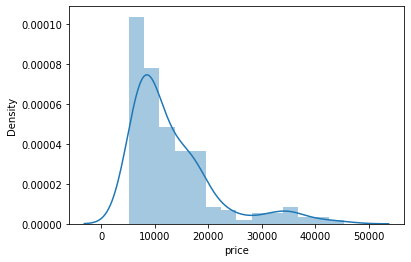

In [ ]:
ax = sns.distplot(cars['price'])
ax

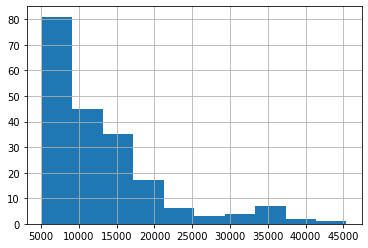

In [ ]:
cars['price'].hist()

In [ ]:
freq_quantitativas.head()

,Frequencia,Porcentagem
E,138,69.0
D,45,22.5
C,9,4.5
B,5,2.5
A,3,1.5


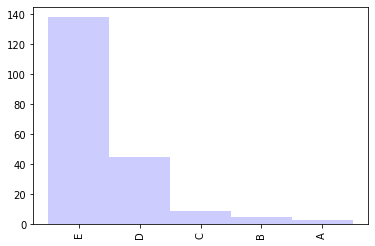

In [ ]:
freq_quantitativas['Frequencia'].plot.bar(width=1, alpha=0.2, color='blue')


In [ ]:
cars['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

### Medidas de Tendencia Central

In [ ]:
dictNotas = {
    'joao': [8, 10, 4, 8, 6, 10, 8],
    'manoel': [10, 2, 0.5, 1, 3, 9.5, 10],
    'maria': [7.5, 8, 7, 8, 8, 8.5, 7]
}

listDisciplinas = ['Matemática', 'Português', 'Inglês', 'Geografia', 'Física',
                   'Química', 'História']

In [ ]:
df = pd.DataFrame(
    data=dictNotas,
    index=listDisciplinas)

In [ ]:
df

,joao,manoel,maria
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Física,6,3.0,8.0
Química,10,9.5,8.5
História,8,10.0,7.0


In [ ]:
df.rename_axis('Matérias', axis='columns', inplace=True)

In [ ]:
df

Matérias,joao,manoel,maria
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Física,6,3.0,8.0
Química,10,9.5,8.5
História,8,10.0,7.0


### Média

In [ ]:
(5 + 4 + 3 + 8 + 100)/5 

24.0

In [ ]:
df['maria'].mean()

7.714285714285714

In [ ]:
cars['price'].mean()

13207.129353233831

## Mediana

In [ ]:
df['maria'].median()

8.0

In [ ]:
df['manoel'].mean()

5.142857142857143

In [ ]:
df['manoel'].median()

3.0

### Moda

In [ ]:
df

Matérias,joao,manoel,maria
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Física,6,3.0,8.0
Química,10,9.5,8.5
História,8,10.0,7.0


In [ ]:
df['maria'].mode()

0    8.0
dtype: float64

In [ ]:
df['manoel'].mode()

0    10.0
dtype: float64

In [ ]:
df['joao'].mode()

0    8
dtype: int64

In [ ]:
cars['price'].mode()

0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


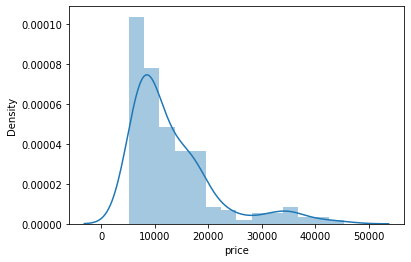

In [ ]:
ax = sns.distplot(cars['price'])
ax

In [ ]:
moda = cars['price'].mode()[0]

In [ ]:
mediana = cars['price'].median()

In [ ]:
media = cars['price'].mean()

In [ ]:
moda < mediana < media

True

## Medidas Separatrizes

In [ ]:
cars['price'].median()

10295.0

In [ ]:
cars['price'].quantile()

10295.0

In [ ]:
cars['price'].quantile([0.25, 0.5, 0.75])

0.25     7775.0
0.50    10295.0
0.75    16500.0
Name: price, dtype: float64

In [ ]:
decis = []
for i in range(1,10):
  decis.append(i/10)

In [ ]:
decis

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
cars['price'].quantile(decis)

0.1     6649.0
0.2     7349.0
0.3     7999.0
0.4     9095.0
0.5    10295.0
0.6    12440.0
0.7    15250.0
0.8    17199.0
0.9    22470.0
Name: price, dtype: float64

In [ ]:
cars['price'].quantile([ i/10 for i in range(1,10)])

0.1     6649.0
0.2     7349.0
0.3     7999.0
0.4     9095.0
0.5    10295.0
0.6    12440.0
0.7    15250.0
0.8    17199.0
0.9    22470.0
Name: price, dtype: float64

In [ ]:
cars['price'].quantile([ i/100 for i in range(1,100)])

0.01     5195.0
0.02     5389.0
0.03     5499.0
0.04     5572.0
0.05     6189.0
         ...   
0.95    32528.0
0.96    34184.0
0.97    35550.0
0.98    36880.0
0.99    40960.0
Name: price, Length: 99, dtype: float64

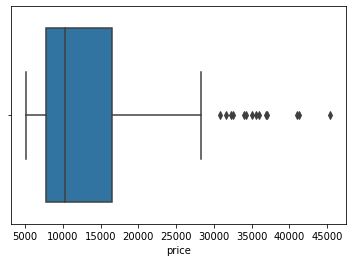

In [ ]:
ax = sns.boxplot(x='price', data=cars, orient='h')
ax

In [ ]:
cars['price'].quantile([0.25, 0.5, 0.75])

0.25     7775.0
0.50    10295.0
0.75    16500.0
Name: price, dtype: float64

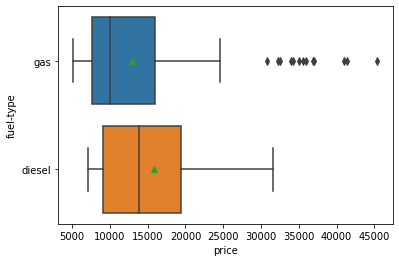

In [ ]:
ax = sns.boxplot(x='price', y='fuel-type', data=cars, showmeans=True, orient='h')
ax

## Medidas de dispersao

In [ ]:
df

Matérias,joao,manoel,maria
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Física,6,3.0,8.0
Química,10,9.5,8.5
História,8,10.0,7.0


In [ ]:
df['joao'].median()

8.0

In [ ]:
df['joao'].mean()

7.714285714285714

In [ ]:
df['maria'].median()

8.0

In [ ]:
df['maria'].mean()

7.714285714285714

In [ ]:
notas_joao = df[['joao']]
notas_joao

Matérias,joao
Matemática,8
Português,10
Inglês,4
Geografia,8
Física,6
Química,10
História,8


In [ ]:
media_joao = notas_joao.mean()[0]
media_joao

7.714285714285714

In [ ]:
notas_joao['desvio'] = notas_joao['joao'] - media_joao 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Desvio Medio Absoluto

In [ ]:
notas_joao

Matérias,joao,desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
Física,6,-1.714286
Química,10,2.285714
História,8,0.285714


In [ ]:
notas_joao['desvio'].sum()

-8.881784197001252e-16

In [ ]:
notas_joao['|desvio|'] = notas_joao['desvio'].abs()

In [ ]:
notas_joao

Matérias,joao,desvio,|desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
Física,6,-1.714286,1.714286
Química,10,2.285714,2.285714
História,8,0.285714,0.285714


In [ ]:
notas_joao['|desvio|'].mean()

1.5510204081632648

In [ ]:
notas_joao['joao'].mad()

1.5510204081632648

In [ ]:
notas_joao['joao'][2]

4

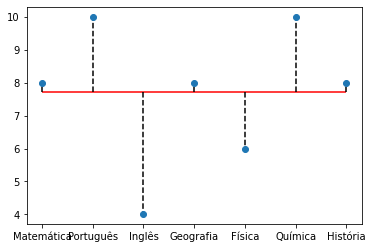

In [ ]:
ax = notas_joao['joao'].plot(style='o')
ax.hlines(y=media_joao, xmin=0, xmax=6, color='red')
for i in range(7):
  ax.vlines(x=i,ymin=media_joao, ymax=notas_joao['joao'][i], linestyles='dashed')
ax

In [ ]:
media_maria = df['maria'].mean()
notas_maria = df[['maria']]
notas_maria

Matérias,maria
Matemática,7.5
Português,8.0
Inglês,7.0
Geografia,8.0
Física,8.0
Química,8.5
História,7.0


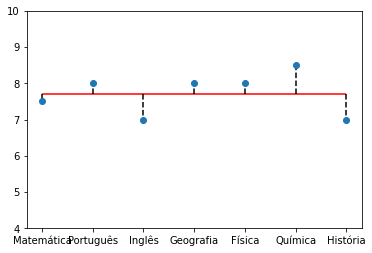

In [ ]:
ax = notas_maria['maria'].plot(style='o')
ax.set_ylim(4, 10)
ax.hlines(y=media_maria, xmin=0, xmax=6, color='red')
for i in range(7):
  ax.vlines(x=i,ymin=media_maria, ymax=notas_maria['maria'][i], linestyles='dashed')
ax

### Variancia

In [ ]:
notas_joao['desvio^2'] = notas_joao['desvio'].pow(2)

In [ ]:
notas_joao

Matérias,joao,desvio,|desvio|,desvio^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
Física,6,-1.714286,1.714286,2.938776
Química,10,2.285714,2.285714,5.224490
História,8,0.285714,0.285714,0.081633


In [ ]:
variancia = notas_joao['joao'].var()

In [ ]:
np.sqrt(variancia)

2.1380899352993947

## Desvio Padrão

In [ ]:
notas_joao['joao'].std()

2.1380899352993947

In [ ]:
df

Matérias,joao,manoel,maria
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Física,6,3.0,8.0
Química,10,9.5,8.5
História,8,10.0,7.0


In [ ]:
df.mean()

Matérias
joao      7.714286
manoel    5.142857
maria     7.714286
dtype: float64

In [ ]:
df.median()

Matérias
joao      8.0
manoel    3.0
maria     8.0
dtype: float64

In [ ]:
df.std()

Matérias
joao      2.138090
manoel    4.460141
maria     0.566947
dtype: float64